In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
import pandas as pd

# Load GDP data (assuming it has 'Country', 'Year', and 'GDP' columns)
gdp_df = pd.read_csv('GDP by Country 1999-2022.csv')

# Load Population data (assuming it has 'Country', 'Year', and 'Population' columns)
population_df = pd.read_csv('The_World_Bank_Population_growth_(annual_).csv')

# Reshape the GDP DataFrame
gdp_df = pd.melt(gdp_df, id_vars=['Country'], var_name='Year', value_name='GDP')

# Reshape the Population DataFrame
population_df = pd.melt(population_df, id_vars=['country_name', 'country_code'], var_name='Year', value_name='Population')

# Filter the population data to only include years 1999-2022
population_df = population_df[population_df['Year'].between('1999', '2022')]

# Merge the datasets on 'country_name' and 'Year', keeping 'country_code'
combined_df = pd.merge(gdp_df, population_df, left_on=['Country', 'Year'], right_on=['country_name', 'Year'], how='inner')

# Drop the redundant 'country_name' column (already in 'Country')
combined_df.drop(columns=['country_name'], inplace=True)

# Clean the 'GDP' column by removing commas and converting to numeric
combined_df['GDP'] = combined_df['GDP'].replace({',': ''}, regex=True)  # Remove commas
combined_df['GDP'] = pd.to_numeric(combined_df['GDP'], errors='coerce')  # Convert to numeric

# Convert 'Year' to numeric
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Inspect the combined DataFrame
print(combined_df.head())


               Country  Year      GDP country_code  Population
0              Albania  1999    3.444          ALB   -0.633352
1              Algeria  1999   48.845          DZA    1.398429
2               Angola  1999    6.153          AGO    3.226448
3  Antigua and Barbuda  1999    0.652          ATG    1.706407
4            Argentina  1999  283.523          ARG    1.152044


In [74]:
combined_df[combined_df['Country'] == 'Russia']


,Country,Year,GDP,country_code,Population
119,Russia,1999,195.907,RUS,-0.309278
279,Russia,2000,259.702,RUS,-0.420615
439,Russia,2001,306.583,RUS,-0.424091
599,Russia,2002,345.486,RUS,-0.460024
759,Russia,2003,431.429,RUS,-0.453781
919,Russia,2004,591.861,RUS,-0.402681
1079,Russia,2005,763.878,RUS,-0.381453
1239,Russia,2006,979.048,RUS,-0.327445
1399,Russia,2007,1166.560,RUS,-0.171082
1559,Russia,2008,1344.540,RUS,-0.043949


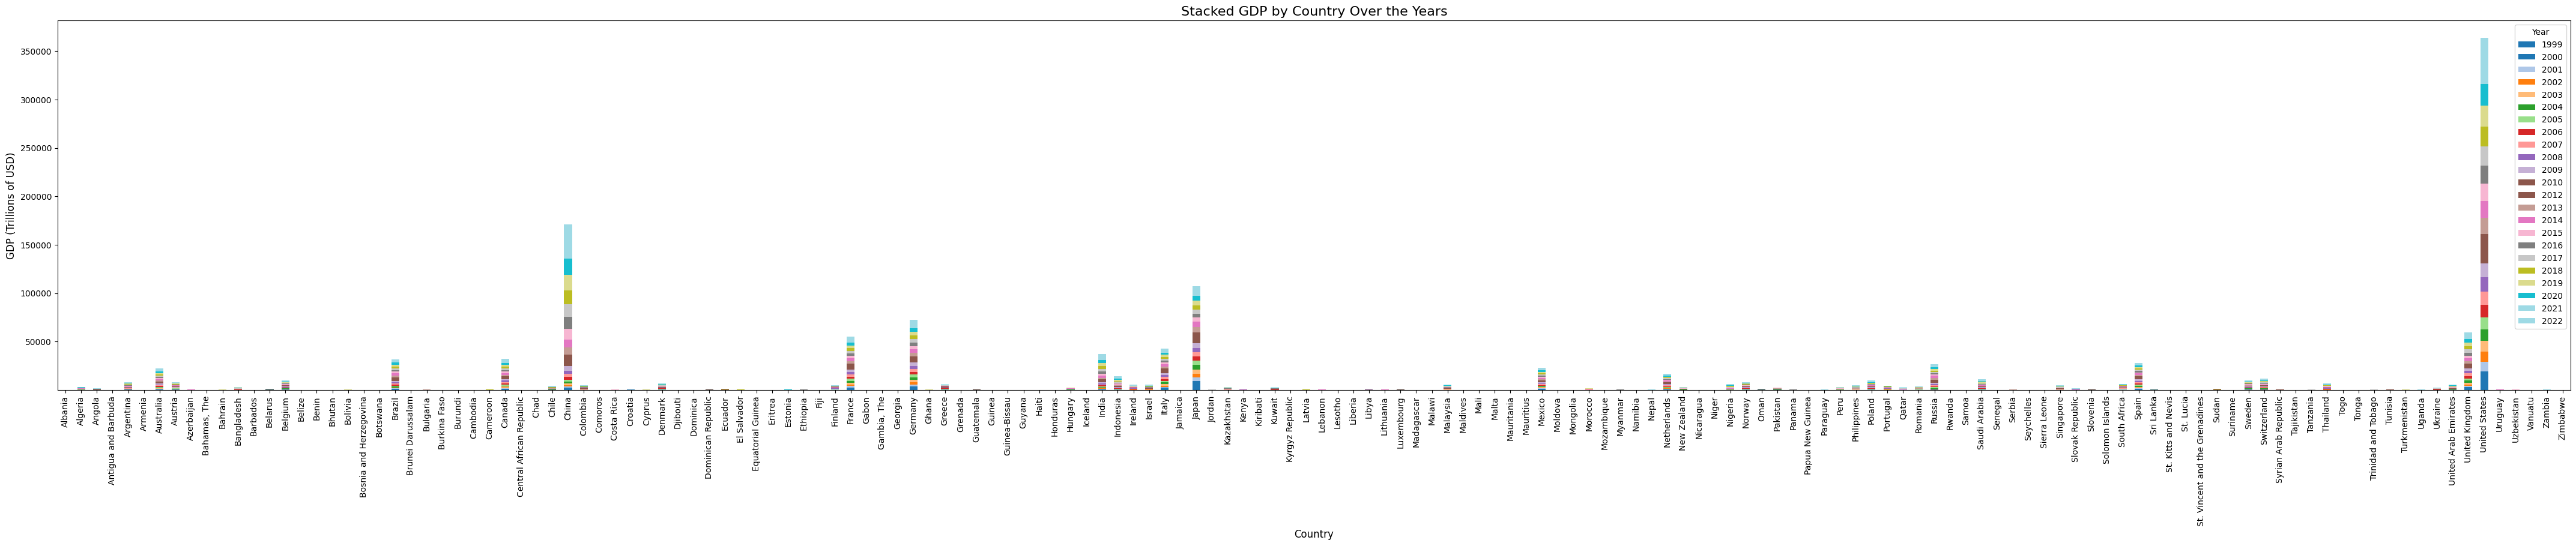

In [75]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
# Example of loading combined_df (Replace this with your actual data)
# combined_df = pd.read_csv('your_data.csv')

# Group by Year and Country, and calculate the sum of GDP
df_grouped = combined_df.groupby(['Year', 'Country','country_code'])['GDP'].sum().reset_index()

# Pivot the data to have years as columns and countries as rows
df_pivot = df_grouped.pivot(index='Country', columns='Year', values='GDP')
# Plot the stacked bar graph
df_pivot.plot(kind='bar', stacked=True, figsize=(54, 8), cmap='tab20')

# Add labels and title
plt.title('Stacked GDP by Country Over the Years', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (Trillions of USD)', fontsize=12)
plt.xticks(rotation=90)  # Rotate country labels if necessary

# Show the plot
plt.show()



In [76]:
# Step 1: Calculate the total GDP for each country across all years
df_grouped_total_gdp = df_grouped.groupby('Country')['GDP'].sum().reset_index()

# Step 2: Sort the countries by total GDP in descending order
df_grouped_total_gdp = df_grouped_total_gdp.sort_values(by='GDP', ascending=False).reset_index(drop=True)

# Step 3: Display the final table
print(df_grouped_total_gdp)


            Country         GDP
0     United States  363522.210
1             China  171222.600
2             Japan  107529.050
3           Germany   72798.340
4    United Kingdom   59417.110
..              ...         ...
155         Comoros      13.275
156        Dominica       9.644
157     Gambia, The       8.673
158           Tonga       7.520
159        Kiribati       2.663

[160 rows x 2 columns]


# Observation
Here the data showcases that the top countries that have grown their GDP between 1999 - 2022 are:

| Country         | GDP (Trillions of USD) |
|-----------------|------------------------|
| United States   | 363522.210             |
| China           | 171222.600             |
| Japan           | 107529.050             |
| Germany         | 72798.340              |
| United Kingdom  | 59417.110              |


We will be using this to know:
- What country-level factors (e.g., GDP, population) influence medal counts?


In [6]:
# Load and read the datasets 
athlete_events = pd.read_csv('athlete_events.csv')
noc_regions = pd.read_csv('noc_regions.csv')

# Merge the datasets on the 'NOC' column
merged_data = athlete_events.merge(noc_regions, on='NOC', how='left')

# Check for missing values in the 'region' column
missing_regions = merged_data['region'].isnull().sum()

missing_values = merged_data.isnull().sum()

# Drop irrelevant columns (such as 'notes')
cleaned_data = merged_data.drop(columns=['notes'])

# Handle missing values for 'Medal'
cleaned_data['Medal'] = cleaned_data['Medal'].fillna('No Medal')

# Remove duplicate rows
cleaned_data = cleaned_data.drop_duplicates()

# Standardize text data (lowercase for consistency)
cleaned_data['Sex'] = cleaned_data['Sex'].str.lower()
cleaned_data['Sport'] = cleaned_data['Sport'].str.lower()

# Add a binary column for medal presence
cleaned_data['Medal_Won'] = cleaned_data['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)

# Check for missing values after cleaning
missing_values_after_cleaning = cleaned_data.isnull().sum()

# Getting mean value depending on the gender
gender_means = cleaned_data.groupby('Sex')[['Height', 'Weight']].mean().round(1)

for gender in cleaned_data['Sex'].unique():
    gender_mask = cleaned_data['Sex'] == gender

    # Fill height
    height_mask = gender_mask & cleaned_data['Height'].isna()
    cleaned_data.loc[height_mask, 'Height'] = gender_means.loc[gender, 'Height']

    # Fill weight
    weight_mask = gender_mask & cleaned_data['Weight'].isna()
    cleaned_data.loc[weight_mask, 'Weight'] = gender_means.loc[gender, 'Weight']

# Round Data to one decimal
cleaned_data[['Height', 'Weight']] = cleaned_data[['Height', 'Weight']].round(1)


print(gender_means)
print()
cleaned_data.head()

     Height  Weight
Sex                
f     167.8    60.0
m     178.9    75.7



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_Won
0,1,A Dijiang,m,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,basketball,Basketball Men's Basketball,No Medal,China,0
1,2,A Lamusi,m,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,judo,Judo Men's Extra-Lightweight,No Medal,China,0
2,3,Gunnar Nielsen Aaby,m,24.0,178.9,75.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,football,Football Men's Football,No Medal,Denmark,0
3,4,Edgar Lindenau Aabye,m,34.0,178.9,75.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,tug-of-war,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1
4,5,Christine Jacoba Aaftink,f,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,speed skating,Speed Skating Women's 500 metres,No Medal,Netherlands,0


In [7]:
## Converts Male to 1 and Female to 0
le = LabelEncoder()
sex = le.fit_transform(cleaned_data['Sex'])
cleaned_data.drop("Sex", axis=1, inplace=True)
cleaned_data["Sex"] = sex
cleaned_data.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_Won,Sex
0,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,basketball,Basketball Men's Basketball,No Medal,China,0,1
1,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,judo,Judo Men's Extra-Lightweight,No Medal,China,0,1
2,3,Gunnar Nielsen Aaby,24.0,178.9,75.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,football,Football Men's Football,No Medal,Denmark,0,1
3,4,Edgar Lindenau Aabye,34.0,178.9,75.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,tug-of-war,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,1
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,speed skating,Speed Skating Women's 500 metres,No Medal,Netherlands,0,0


### Observations from Data Cleaning and Exploration:

1. **Data Merging:**  
   The datasets **athlete_events** and **noc_regions** were successfully merged on the **'NOC'** column, adding country-level **'region'** information.

2. **Missing Values Handling:**  
   - Missing **'Medal'** values were filled with **'No Medal'**.
   - Missing **'Height'** and **'Weight'** values were imputed using gender-specific mean values.
   
3. **Standardization:**  
   The **'Sex'** and **'Sport'** columns were standardized to lowercase for consistency.

4. **Binary Medal Indicator:**  
   A new **'Medal_Won'** column was created to indicate whether an athlete won a medal (1) or not (0).

5. **Duplication Removal:**  
   Duplicate rows were removed to ensure unique athlete records.

6. **GDP and Population Integration (Future Step):**  
   GDP and population data will be integrated to explore how economic factors impact Olympic performance.


# Data Exploration

- Q1. Which countries tend to win the most medals, and why?
- Q2. Which sports contribute the most to a country's overall medal count?
- Q3. What is the impact of Hosting Influence on Medals?
- Q4. What country-level factors (e.g., GDP, population) influence medal counts?

In [8]:
medal_per_country = cleaned_data[['region', 'Medal', 'Medal_Won']].copy()
medal_per_country.head()

,region,Medal,Medal_Won
0,China,No Medal,0
1,China,No Medal,0
2,Denmark,No Medal,0
3,Denmark,Gold,1
4,Netherlands,No Medal,0


- Q1. Which countries tend to win the most medals, and why?

In [9]:
count_medals = cleaned_data[cleaned_data['Medal_Won'] == 1]['region'].value_counts()
top_countries = count_medals.head(5)
print(top_countries)

region
USA        5637
Russia     3947
Germany    3756
UK         2067
France     1767
Name: count, dtype: int64


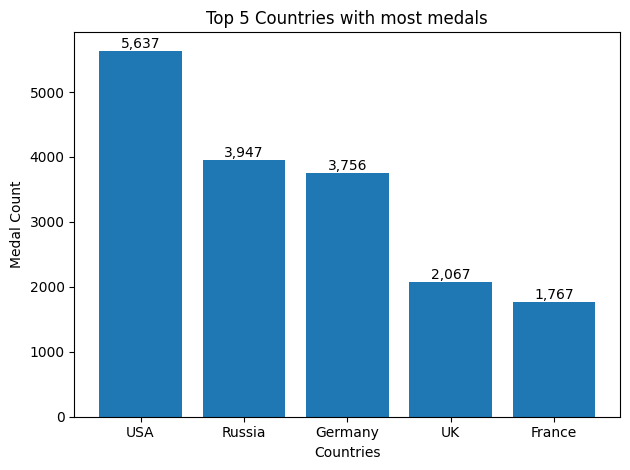

In [10]:
fig, ax = plt.subplots()
plt.title("Top 5 Countries with most medals")
# Assign x and y coordinates
bars = ax.bar(top_countries.index , top_countries.values)

# Add x and y labels
plt.xlabel("Countries")
plt.ylabel("Medal Count")

# Go through each bar and add its value on top of it
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Observations

We can observe that the top 5 countries are mostly countries that are economically powerful, being USA the world power and getting the most amount of medals

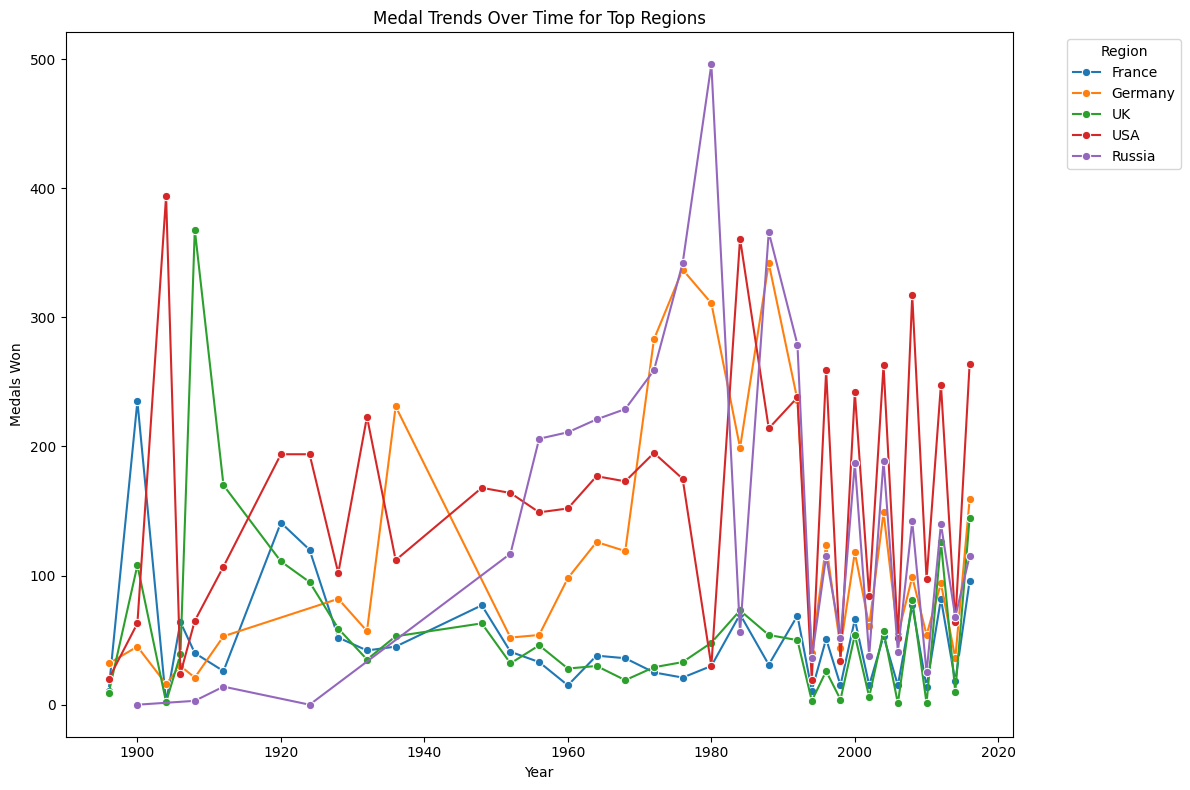

In [11]:
# Data cleaning and preprocessing
merged_data['Medal_Won'] = merged_data['Medal'].notnull().astype(int)  # Binary target: Medal won or not

# Analysis for Most Likely Combination of Country, Region, and Sport
medal_by_region_sport = merged_data.groupby(['region', 'Sport'])['Medal_Won'].sum().reset_index()
top_sport_regions = medal_by_region_sport.sort_values(by='Medal_Won', ascending=False).head(10)

# Analysis for Trends in Medal Counts Over Time
medals_over_time = merged_data.groupby(['Year', 'region'])['Medal_Won'].sum().reset_index()

# Selecting top regions for visualization
top_regions = medals_over_time.groupby('region')['Medal_Won'].sum().nlargest(5).index
medals_over_time_filtered = medals_over_time[medals_over_time['region'].isin(top_regions)]

# Plot trends over time for top regions
plt.figure(figsize=(12, 8))
sns.lineplot(data=medals_over_time_filtered, x='Year', y='Medal_Won', hue='region', marker='o')
plt.title("Medal Trends Over Time for Top Regions")
plt.xlabel("Year")
plt.ylabel("Medals Won")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

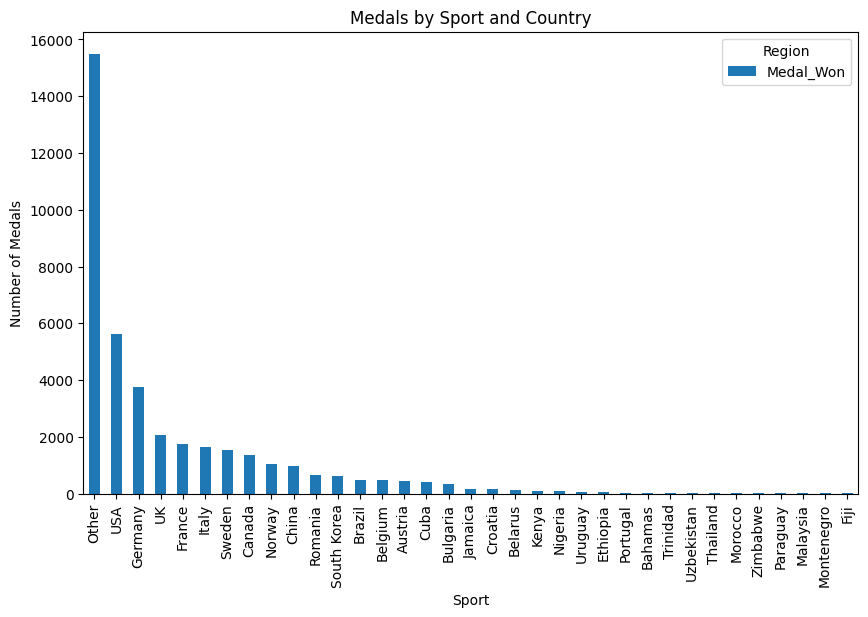

In [12]:
sport_medals = cleaned_data[cleaned_data['Medal_Won'] == 1].groupby(['Sport', 'region'])['Medal_Won'].count().reset_index()

# Grouping regions with less medals than threshold to other
threshold = 10
sport_medals['region'] = sport_medals['region'].apply(lambda x: x if sport_medals[sport_medals['region'] == x]['Medal_Won'].values[0] >= threshold else 'Other')
aggregated = sport_medals.groupby('region')['Medal_Won'].sum().sort_values(ascending=False)
aggregated.plot(kind='bar', figsize=(10,6))
plt.title('Medals by Sport and Country')
plt.ylabel('Number of Medals')
plt.xlabel('Sport')
plt.legend(title='Region')
plt.show()

- Q2. Which sports contribute the most to a country's overall medal count?

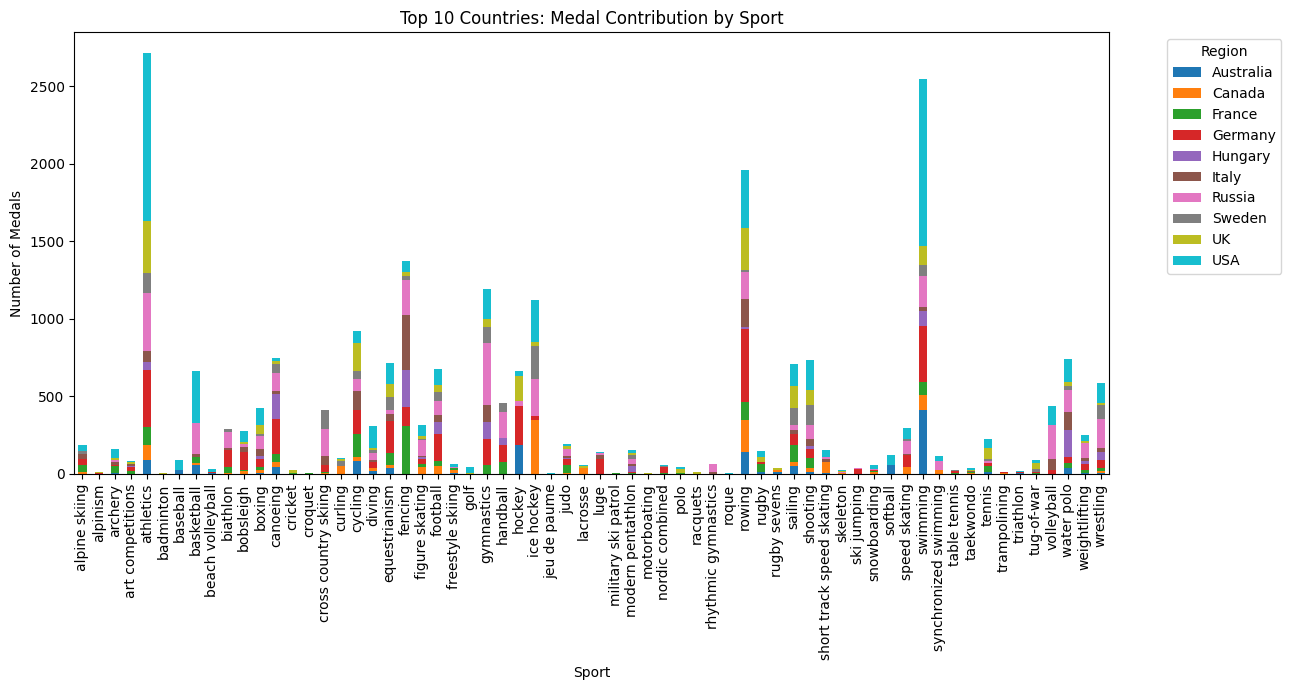

In [13]:
country_medals = cleaned_data[cleaned_data['Medal_Won'] == 1].groupby('region')['Medal_Won'].count().reset_index()
top_countries = country_medals.nlargest(10, 'Medal_Won')['region']

# Filter dataset for top countries
filtered_df = cleaned_data[cleaned_data['region'].isin(top_countries)]

# Re-aggregate by sport and region
filtered_sport_medals = filtered_df[filtered_df['Medal_Won'] == 1].groupby(['Sport', 'region'])['Medal_Won'].count().reset_index()
sport_medals_pivot = filtered_sport_medals.pivot(index='Sport', columns='region', values='Medal_Won').fillna(0)

# Plot
sport_medals_pivot.plot(kind='bar', stacked=True, figsize=(13, 7))
plt.title("Top 10 Countries: Medal Contribution by Sport")
plt.ylabel("Number of Medals")
plt.xlabel("Sport")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

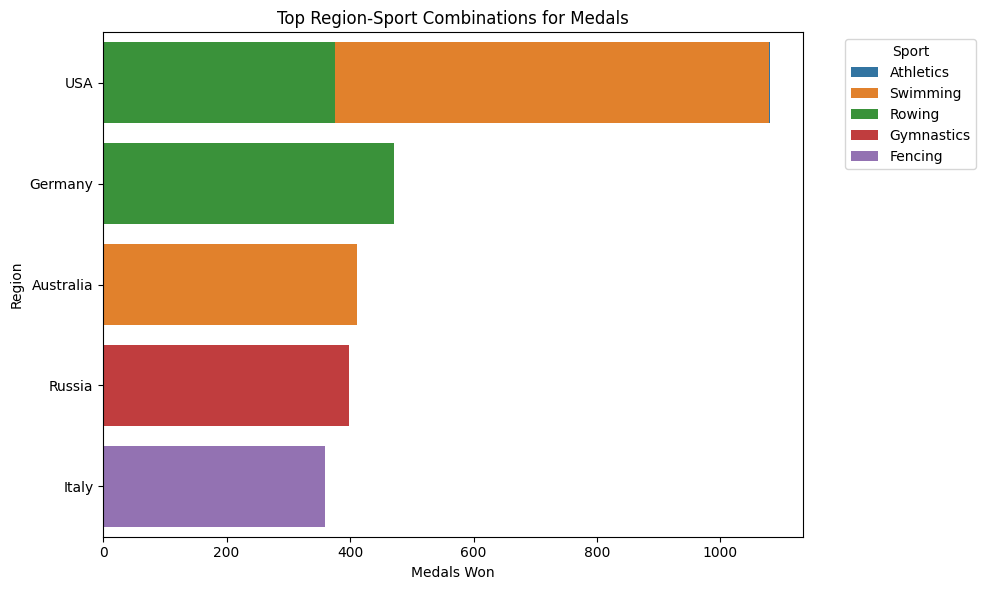

In [14]:
"""
# Data cleaning and preprocessing
merged_data['Medal_Won'] = merged_data['Medal'].notnull().astype(int)  # Binary target: Medal won or not

# Analysis for Most Likely Combination of Country, Region, and Sport
medal_by_region_sport = merged_data.groupby(['region', 'Sport'])['Medal_Won'].sum().reset_index()
top_sport_regions = medal_by_region_sport.sort_values(by='Medal_Won', ascending=False).head(10)

"""

# Visualizing the top region-sport combinations contributing to medals
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sport_regions, x='Medal_Won', y='region', hue='Sport', dodge=False)
plt.title("Top Region-Sport Combinations for Medals")
plt.xlabel("Medals Won")
plt.ylabel("Region")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Q3. What is the impact of Hosting Influence on Medals?

In [15]:
from scipy.stats import ttest_ind

# Hosting Influence on Medal Counts
host_years = {2020: 'Japan', 2016: 'Brazil', 2012: 'United Kingdom', 2008: 'China'}  # Example years
merged_data['Is_Host'] = merged_data.apply(
    lambda row: 1 if row['Year'] in host_years and row['region'] == host_years[row['Year']] else 0, axis=1)

# Compare medal counts for hosting vs. non-hosting years
hosting_medals = merged_data.groupby(['region', 'Is_Host'])['Medal_Won'].sum().reset_index()

# Perform a statistical test
host_medals = hosting_medals[hosting_medals['Is_Host'] == 1]['Medal_Won']
non_host_medals = hosting_medals[hosting_medals['Is_Host'] == 0]['Medal_Won']
t_stat, p_value = ttest_ind(host_medals, non_host_medals, nan_policy='omit')

# Print statistical test results
print("Hosting Influence on Medals:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

Hosting Influence on Medals:
T-statistic: -0.17, P-value: 0.8644


In [25]:
merged_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Medal_Won,Is_Host
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,0,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,0,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,0,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,0,0


The t-statistic measures the difference in means between the two groups, hosting vs non-hosting countires and the p-value represent the probability that the observed difference in the means occurred due to random chance. The t-statistic of -0.17 suggest that there is no significant difference in the average medal counts and the high p-value suggest that there is no evidence to support that the hosting country influences a country's count.

In [16]:
# Pivot the data to have countries as rows and columns as Is_Host (0 for non-host, 1 for host)
stacked_data = hosting_medals.pivot_table(index='region', columns='Is_Host', values='Medal_Won', aggfunc='sum', fill_value=0)

# Rename columns for better understanding
stacked_data.columns = ['Non-Host Medals', 'Host Medals']



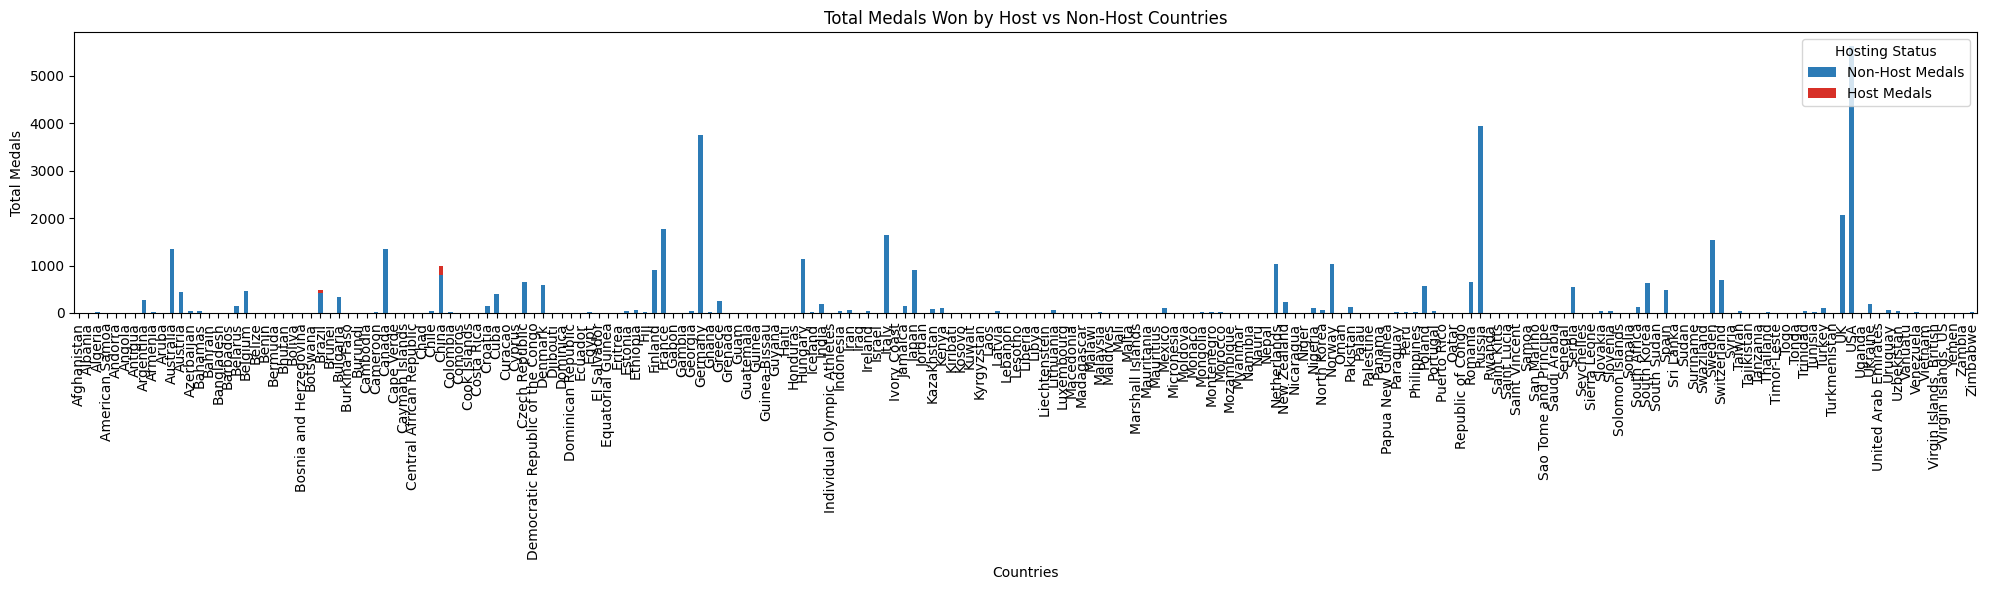

In [19]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(20, 6), color=['#2c7bb6', '#d73027'])

# Customize the plot
plt.title('Total Medals Won by Host vs Non-Host Countries')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.legend(title='Hosting Status', loc='upper right', labels=['Non-Host Medals', 'Host Medals'])
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
stacked_data[stacked_data['Host Medals'] > 0]

,Non-Host Medals,Host Medals
region,,
Brazil,425,50
China,809,184


- For both Brazil and China, the total number of medals won in non-hosting years was higher than the medals won when they hosted the Olympics. This could indicate that hosting the Olympics did not significantly boost their performance in terms of medal counts.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     69407
           1       0.27      0.35      0.30     11928

    accuracy                           0.77     81335
   macro avg       0.58      0.59      0.58     81335
weighted avg       0.79      0.77      0.78     81335

Confusion Matrix:
[[58342 11065]
 [ 7803  4125]]


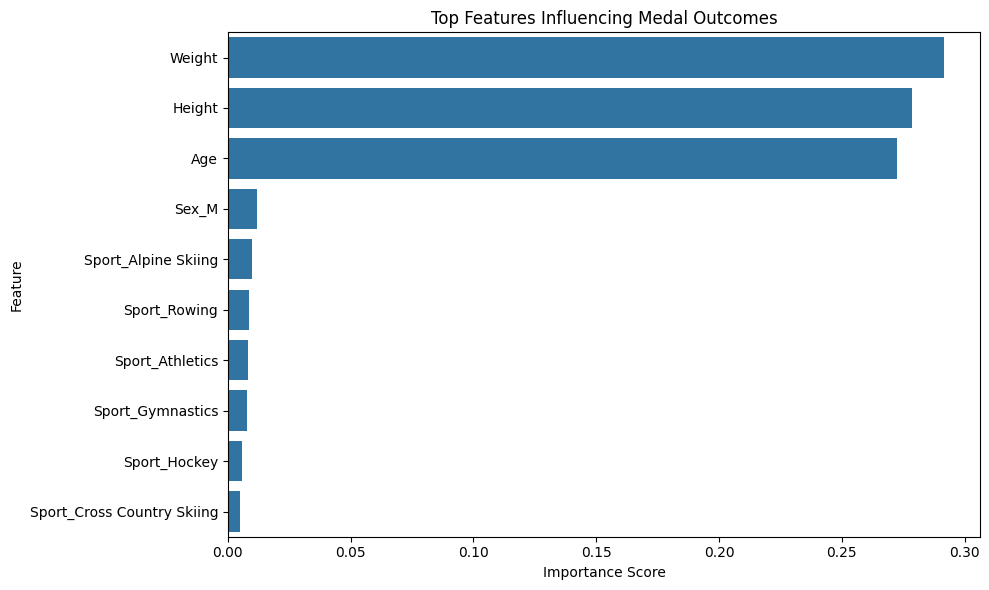

In [ ]:
# Analysis for Factors Influencing Medal Outcomes
# Feature engineering for predictive modeling
features = ['Age', 'Height', 'Weight', 'Sex', 'Sport']
encoded_data = pd.get_dummies(merged_data[features], drop_first=True)
X = encoded_data
y = merged_data['Medal_Won']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')
plt.title("Top Features Influencing Medal Outcomes")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The model performs well for the No Medal class with high precision and recall but struggles with the Medal won class. This model is also biased toward predicitng No Medal since it has a much larger support.

In [ ]:
# Analysis for Predicting Specific Event Outcomes
# Focus on a single sport
swimming_data = merged_data[merged_data['Sport'] == 'Swimming']

# Prepare features and target
features = ['Age', 'Height', 'Weight', 'Sex']
encoded_swimming_data = pd.get_dummies(swimming_data[features], drop_first=True)
X_swimming = encoded_swimming_data
y_swimming = swimming_data['Medal_Won']

# Split data for swimming
X_train_swim, X_test_swim, y_train_swim, y_test_swim = train_test_split(X_swimming, y_swimming, test_size=0.3, random_state=42)

# Train LightGBM for swimming
from lightgbm import LGBMClassifier
lgbm_model_swim = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, class_weight='balanced', random_state=42)
lgbm_model_swim.fit(X_train_swim, y_train_swim)

# Evaluate the LightGBM model for swimming
y_pred_swim = lgbm_model_swim.predict(X_test_swim)
print("LightGBM Classification Report for Swimming:")
print(classification_report(y_test_swim, y_pred_swim))
print("Confusion Matrix for Swimming:")
print(confusion_matrix(y_test_swim, y_pred_swim))

[LightGBM] [Info] Number of positive: 2132, number of negative: 14104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 16236, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

This model shows that No Medal has more support compared to Medal Won support of 916 instances making the peformance skewed. Just like the Random Forest, the Light GBM struggles to correctly classify Medal Won but performs well at identifying No Medal instances. But the recall of 60% indictaes that the model captures more actual Medal Won instances than randomly guessing.

THIS IS FOR THE What country-level factors (e.g., GDP, population) influence medal counts?

In [77]:
df_grouped['country_code'].unique() 

array(['ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN',
       'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'CRI',
       'HRV', 'CYP', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ',
       'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO',
       'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'MOZ',
       'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NOR',
       'OMN', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT',
       'QAT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SRB', 'SYC',
       'SLE', 'SGP',

In [78]:
# Merge cleaned_data with GDP data on 'Country' and 'Year'
medal_gdp_data = merged_data.merge(df_grouped[['Year', 'country_code', 'GDP']], 
                                    left_on=['NOC', 'Year'], 
                                    right_on=['country_code', 'Year'], 
                                    how='left')

# Inspect the merged data
print(medal_gdp_data.head())



   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  ...       City          Sport  \
0  CHN  1992 Summer  1992  ...  Barcelona     Basketball   
1  CHN  2012 Summer  2012  ...     London           Judo   
2  DEN  1920 Summer  1920  ...  Antwerpen       Football   
3  DEN  1900 Summer  1900  ...      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  ...    Calgary  Speed Skating   

                              Event Medal       region notes Medal_Won  \
0       Basketball Men's Basketball   NaN        China   NaN         0   
1      Judo Men's Extra-Ligh

In [ ]:
# medal_gdp_data.drop(columns=['Country', 'country_code', 'GDP'], inplace=True)
# Filter the DataFrame for years between 1999 and 2022
medal_gdp_data[(medal_gdp_data['country_code'] >= 1999) & (medal_gdp_data['Year'] <= 2022)].medal_gdp_data['country_code'].unique




<bound method Series.unique of 0         NaN
1         CHN
2         NaN
3         NaN
4         NaN
         ... 
271111    NaN
271112    POL
271113    POL
271114    NaN
271115    POL
Name: country_code, Length: 271116, dtype: object>

In [84]:
# Filter the data for the years 1999 to 2022 and get the unique country codes
# Check for NaN values in the 'region' column using isnull()
# Filter the data for the years 1999 to 2022
filtered_data = medal_gdp_data[(medal_gdp_data['Year'] >= 1999) & (medal_gdp_data['Year'] <= 2022)]

# Check for NaN values in the 'region' column within the filtered data
nan_values_in_region = filtered_data['region'].isna().sum()

# Print the result
print(f"Number of NaN values in 'region' column for the years 1999-2022: {nan_values_in_region}")


Number of NaN values in 'region' column for the years 1999-2022: 168
